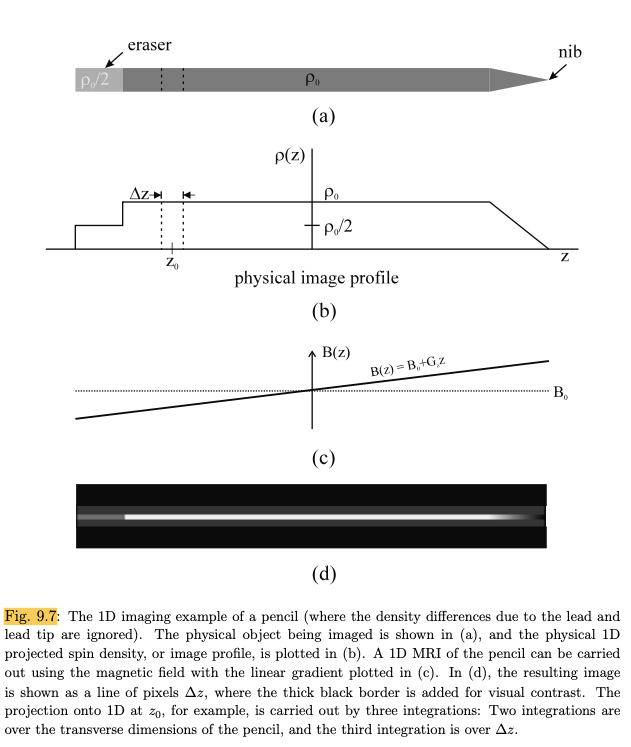

1. $\rho_{0} = 4$
2. $Z = 10$
3. $\Delta Z = 0.1$
4. $B_0 = 1$
5. $G_z = 0.5$


In [1]:
B_0 = 0
G_x = 0.5
z = 10
delta_z = 0.2
gamma = 1
rho_0 = 4

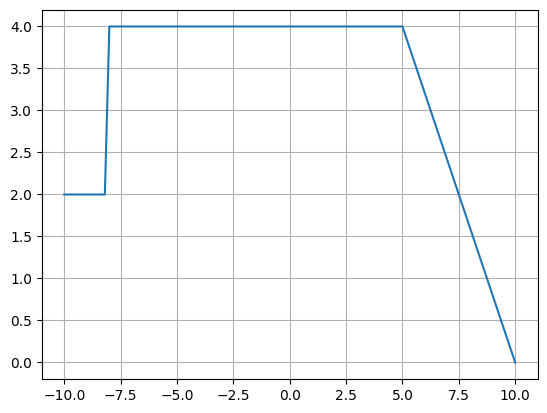

In [3]:
from utilities import *
import matplotlib.pyplot as plt

# physical image profile (density) of a 1-D pencil
pencil_density_profile = density_pencil(z=z, delta_z=delta_z, rho_0=rho_0, plot=True)

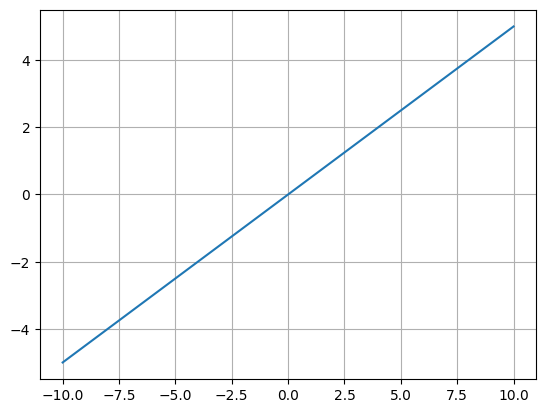

In [4]:
# gradient pulse sequence
# z is just consistent with the physical image profile, not z-axis
pos_z = np.linspace(-z, z, int((z / delta_z) * 2 + 1))

w_G = w_grad(w_0=B_0 * gamma, G_value=G_x, gamma=gamma, pos=pos_z, dim=1)
plt.plot(pos_z, w_G)
plt.grid(True)

1. create a serious spins
2. simulate and display FID process
3. 

/var/folders/4c/z1j8bwdd0kx4d18gkpzwrmvm0000gn/T/ipykernel_59731/859187296.py:50: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))


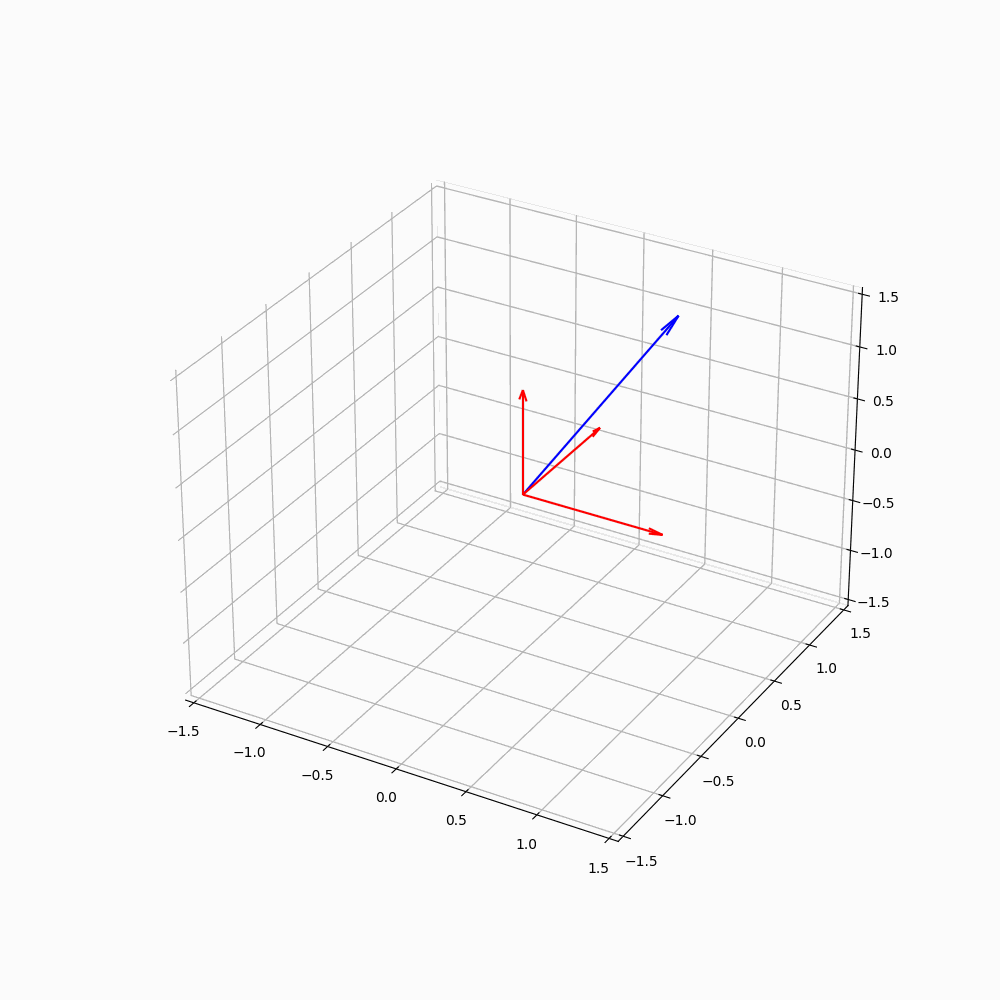

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import imageio
import io®®

def rotate_vector_3d(x, y, z, theta, axis='z'):
    rotation_matrix = {
        'x': np.array([[1, 0, 0],
                       [0, np.cos(theta), -np.sin(theta)],
                       [0, np.sin(theta), np.cos(theta)]]),
        'y': np.array([[np.cos(theta), 0, np.sin(theta)],
                       [0, 1, 0],
                       [-np.sin(theta), 0, np.cos(theta)]]),
        'z': np.array([[np.cos(theta), -np.sin(theta), 0],
                       [np.sin(theta), np.cos(theta), 0],
                       [0, 0, 1]])
    }
    vector = np.array([x, y, z])
    x_new, y_new, z_new = np.dot(rotation_matrix[axis], vector)
    return x_new, y_new, z_new

x, y, z = 1, 1, 1
theta = np.pi / 6
n_steps = 200

# Save plot images as a list
images = []

for i in range(n_steps):
    x, y, z = rotate_vector_3d(x, y, z, theta, axis='z')
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)
    
    ax.quiver(0, 0, 0, x, y, z, color='blue', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, 1, 0, 0, color='red', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, 0, 1, 0, color='red', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, 0, 0, 1, color='red', arrow_length_ratio=0.1)
    
    # Save the plot to a buffer as a PNG
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    
    # Read the buffer as an image and append it to the list
    images.append(imageio.imread(buf))
    plt.close()

# Save the images as a GIF
imageio.mimsave('rotating_vector_3d.gif', images, duration=0.1)

# Display the GIF within the Jupyter notebook
from IPython.display import Image
Image(filename="rotating_vector_3d.gif")
